This is a guided project, and I refered to a youtube video to complete this project.

Video link= "https://youtu.be/Ib4sLduEhTs?si=ZSEvH4VEyw0BTweT"

Here, I used three models to understand time series and its application in forecasting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("monthly_csv.csv")
df.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [3]:
df.shape

(847, 2)

In [4]:
print(f"Date range of gold prices available from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [5]:
date = pd.date_range(start='1/1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [6]:
df['month']=date
df.drop('Date',axis=1,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


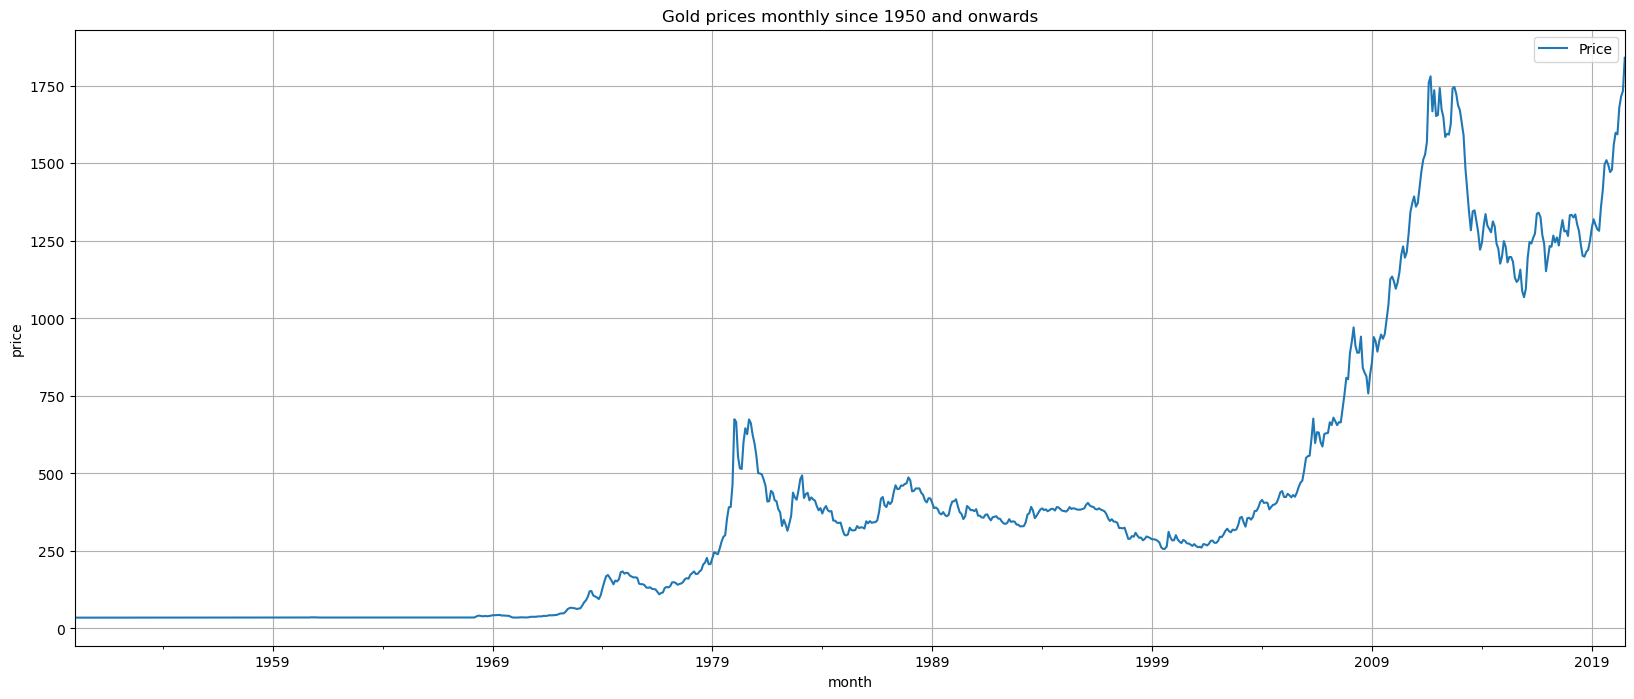

In [7]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.grid()

In [8]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


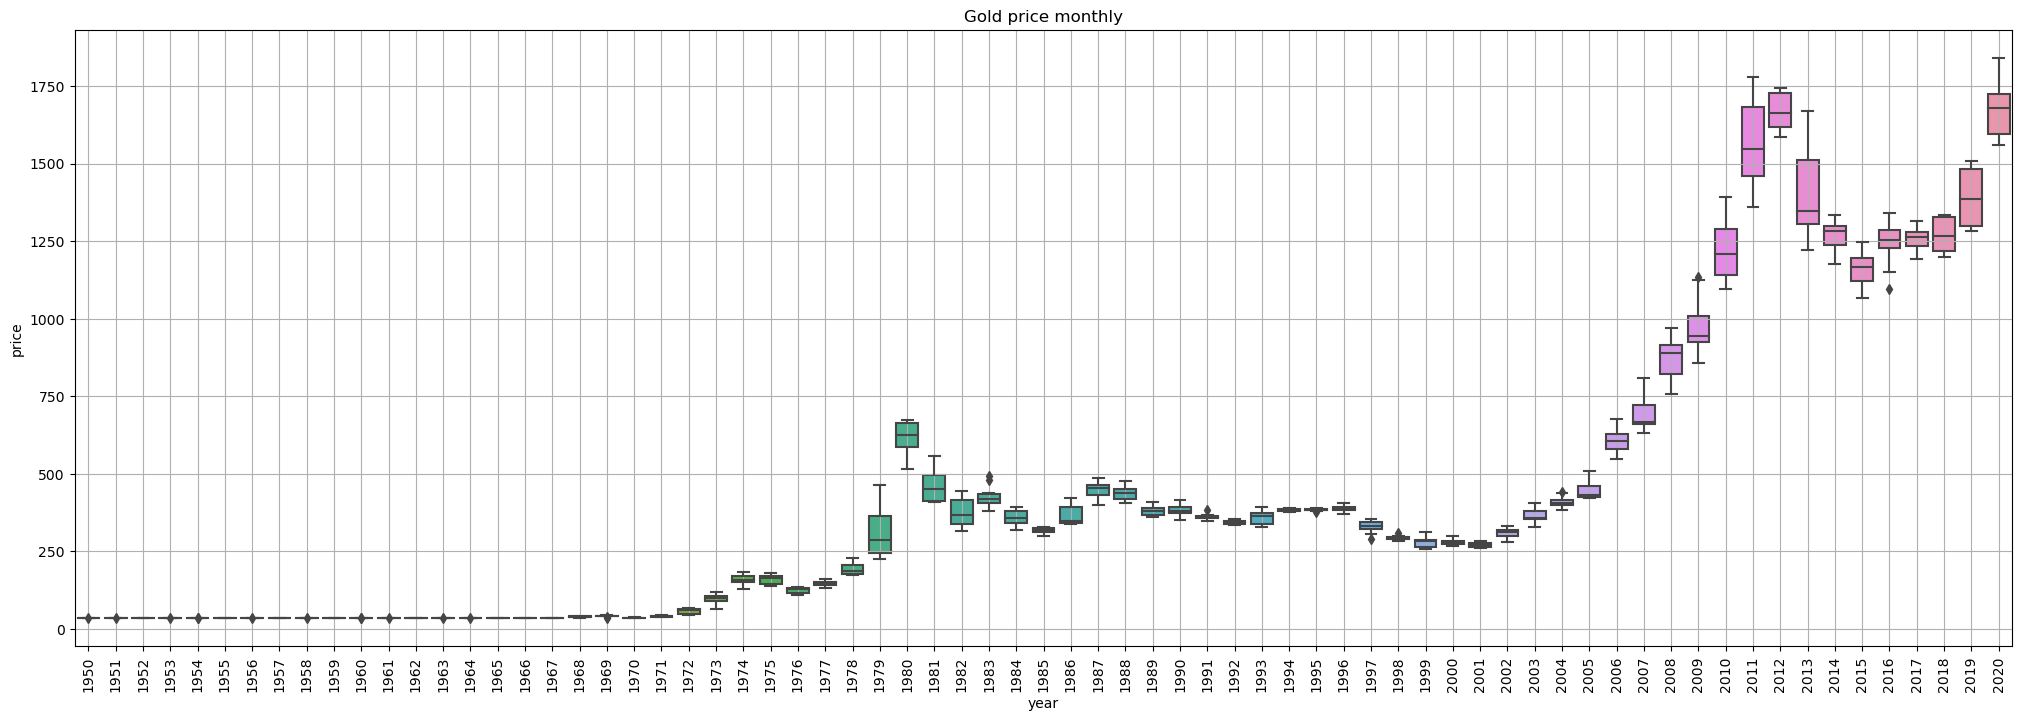

In [9]:
_, ax= plt.subplots(figsize=(25,8))
sns.boxplot(x=df.index.year , y=df.values[:,0],ax=ax)
plt.title('Gold price monthly')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid()

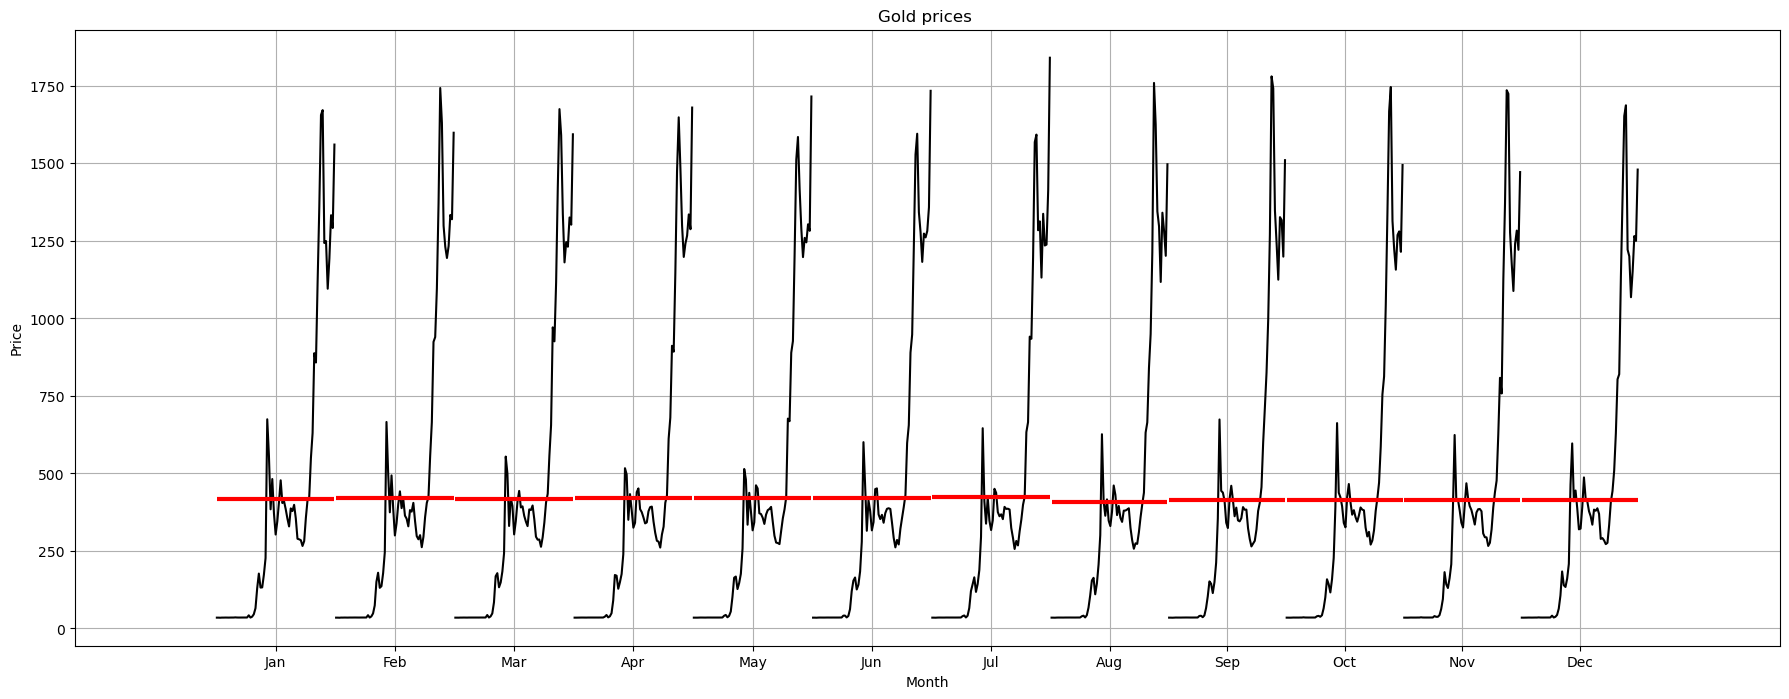

In [10]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax=plt.subplots(figsize=(22,8))
month_plot(df, ylabel="Gold price", ax=ax)
plt.title("Gold prices ")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid()

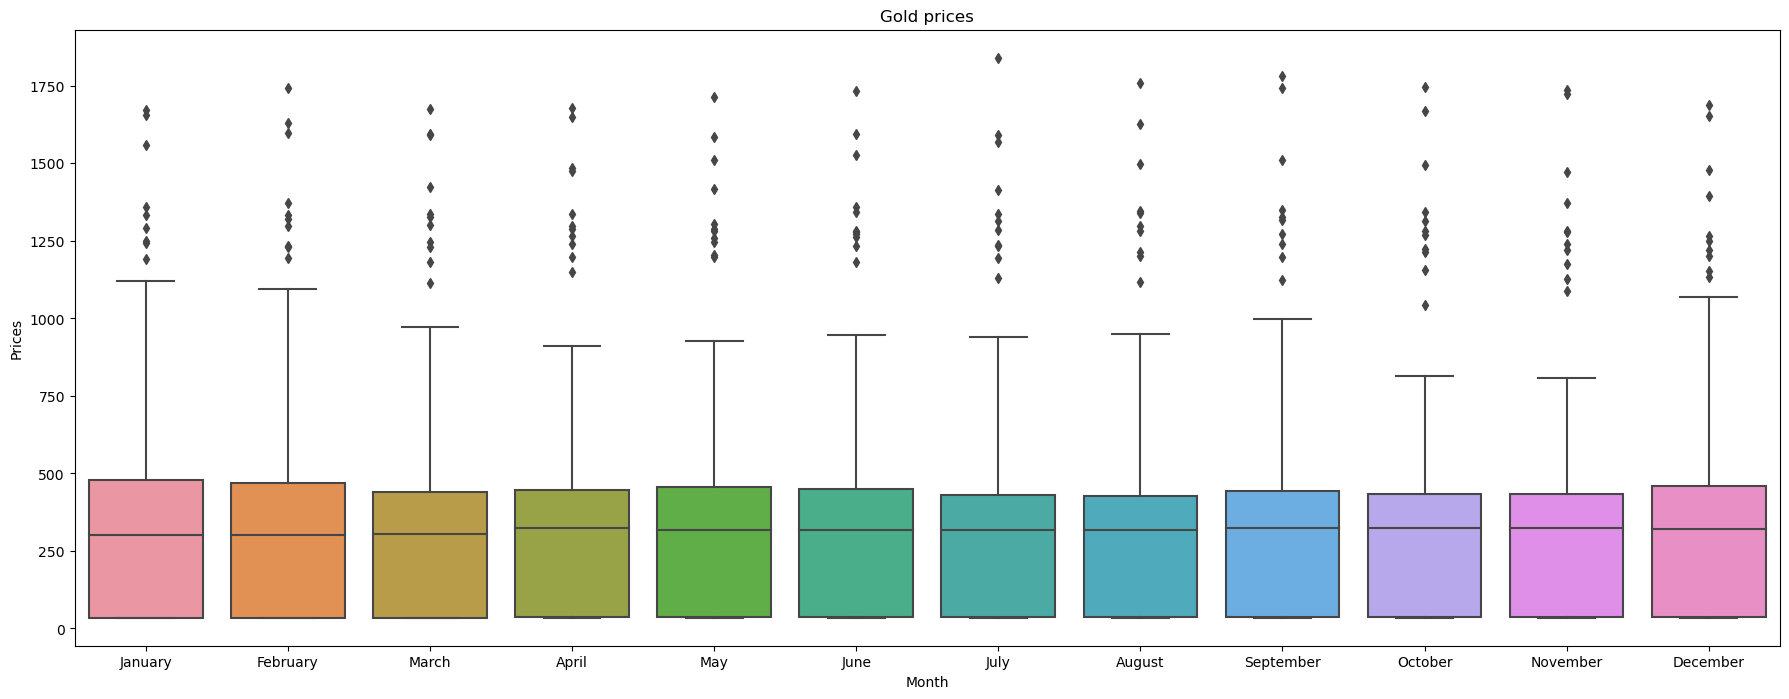

In [11]:
_, ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=df.index.month_name(),y=df.values[:,0],ax=ax)
plt.title("Gold prices")
plt.xlabel("Month")
plt.ylabel("Prices")
plt.show()

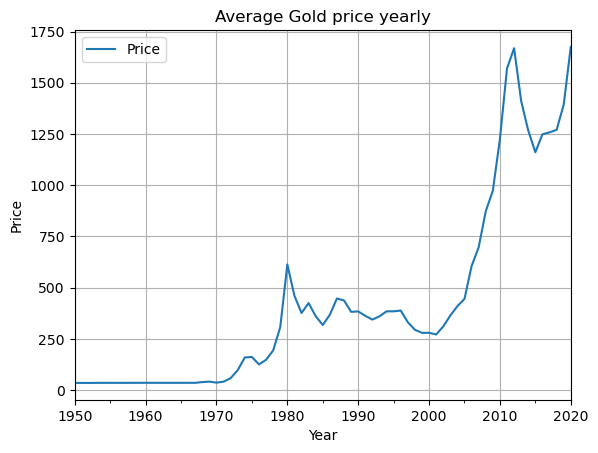

In [12]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title("Average Gold price yearly")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid()

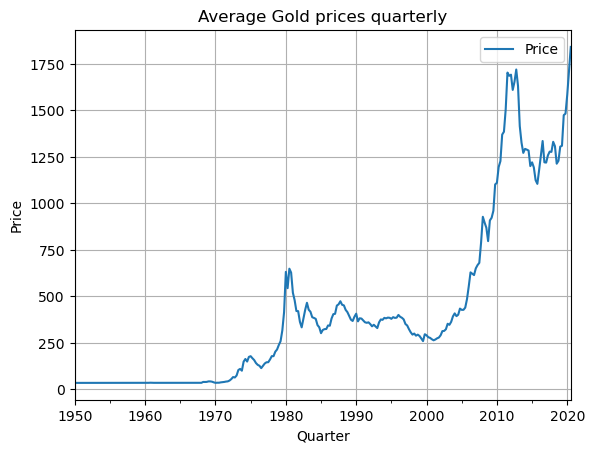

In [13]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title("Average Gold prices quarterly")
plt.xlabel("Quarter")
plt.ylabel("Price")
plt.grid()

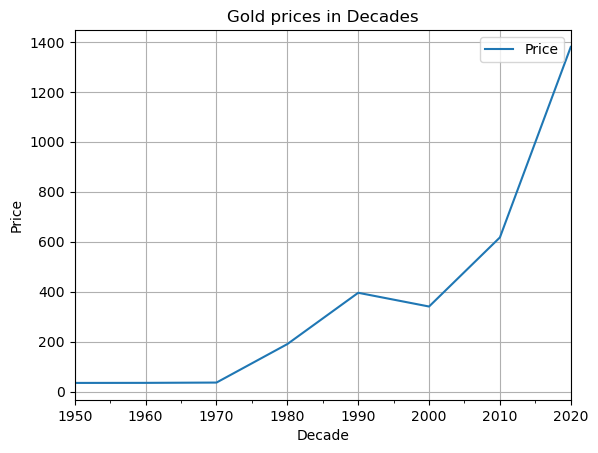

In [14]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("Gold prices in Decades")
plt.xlabel("Decade")
plt.ylabel("Price")
plt.grid()

In [15]:
df_1=df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df_1['Cov_pct']=((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


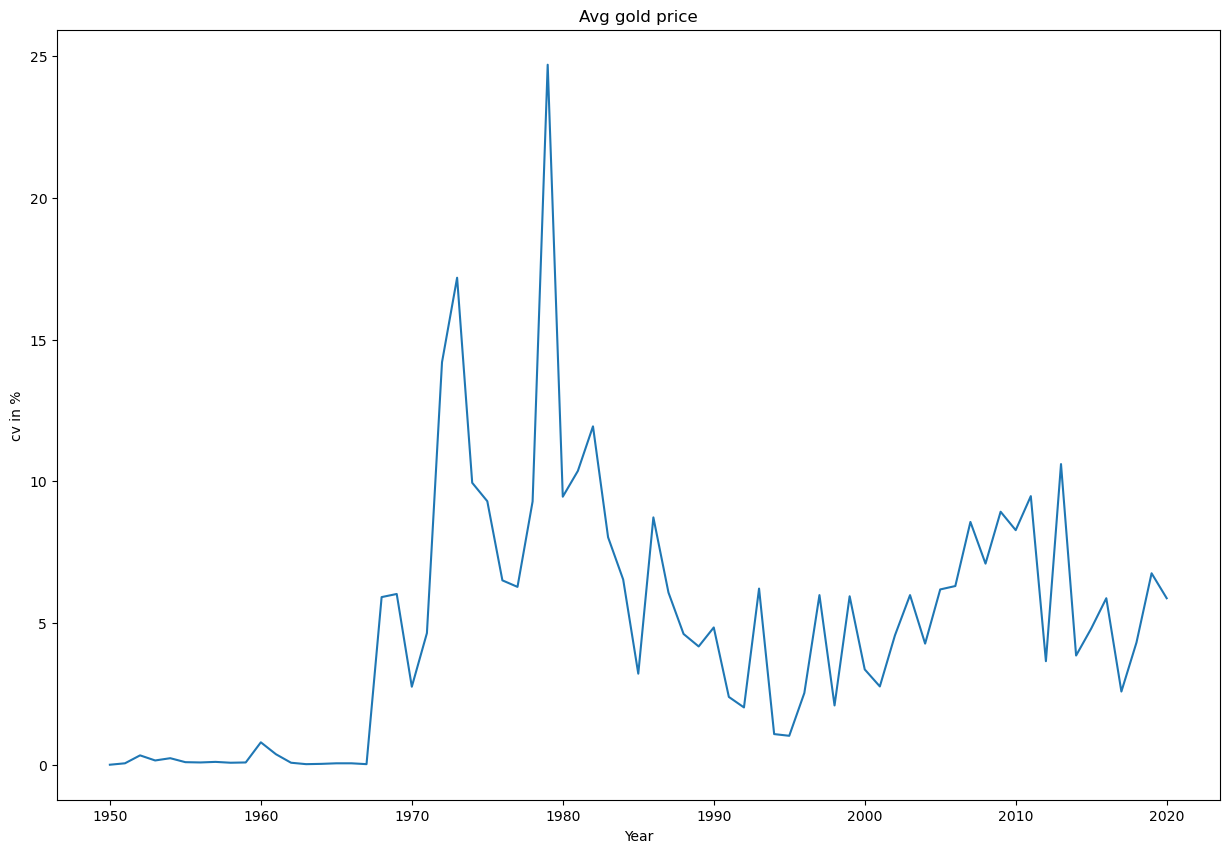

In [16]:
 fig, ax=plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title("Avg gold price")
plt.xlabel("Year")
plt.ylabel("cv in %")
plt.show()

In [19]:
train = df[df.index.year<=2015]
test = df[df.index.year>2015]

In [18]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


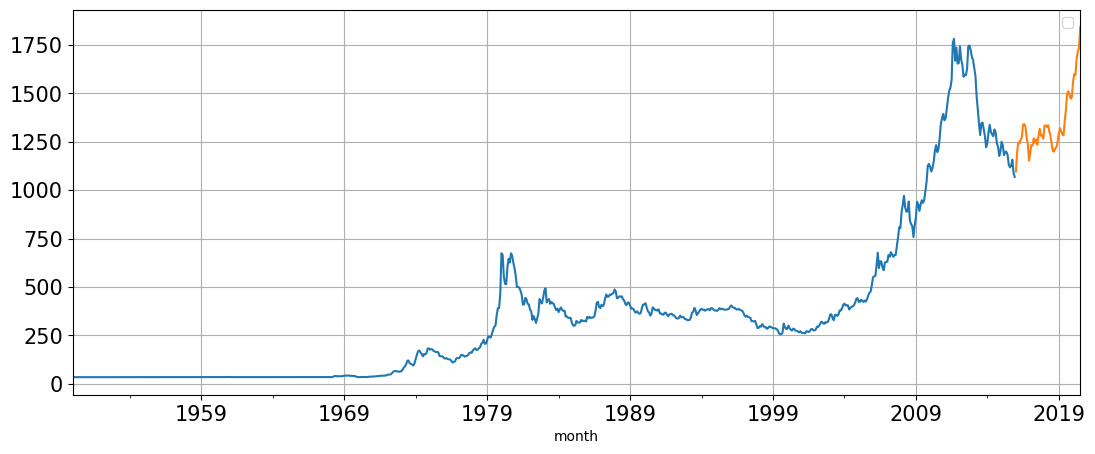

In [20]:
train["Price"].plot(figsize=(13,5), fontsize=15)
test["Price"].plot(figsize=(13,5),fontsize=15)
plt.grid()
plt.legend('Training data','Test data')
plt.show()

In [21]:
train_time= [i+1 for i in range(len(train))]
test_time= [i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)

(792, 55)

In [22]:
LR_train = train.copy()
LR_test = test.copy()

In [23]:
LR_train['time']=train_time
LR_test['time']=test_time

In [24]:
lr=LinearRegression()
lr.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

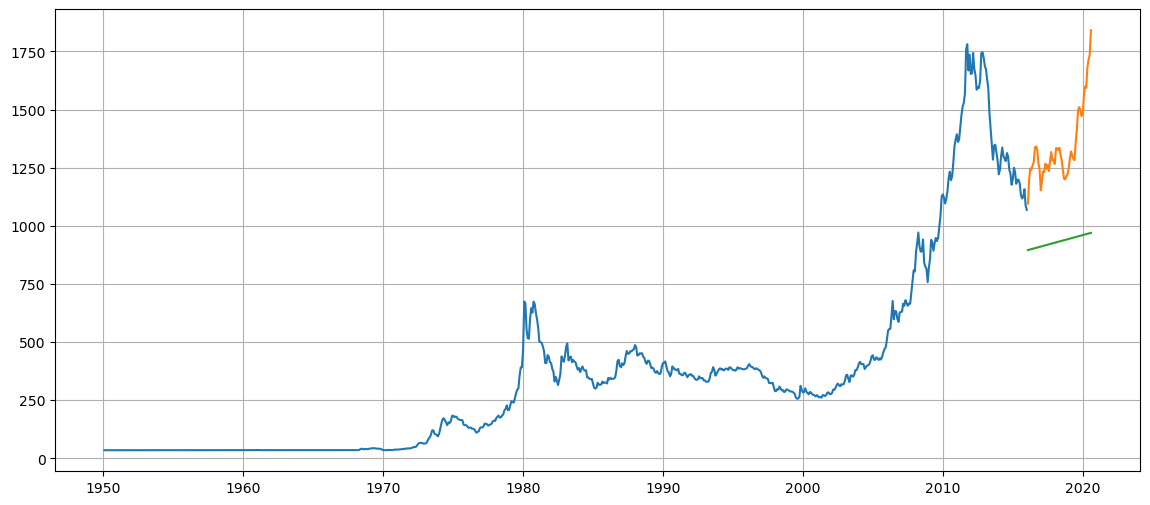

In [25]:
test_prediction_model1=lr.predict(LR_test[['time']])
LR_test['forecast']=test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(LR_test['forecast'],label='reg on time_test data')
plt.grid()

In [26]:
def mape(actual, pred): return round((np.mean(abs(actual-pred)/actual))*100,2)

In [27]:
mape_model1_test=mape(test['Price'].values,test_prediction_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [28]:
results = pd.DataFrame({'Test Mape (%)':[mape_model1_test]}, index=["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [29]:
Naive_train=train.copy()
Naive_test=test.copy()

In [30]:
Naive_test['naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

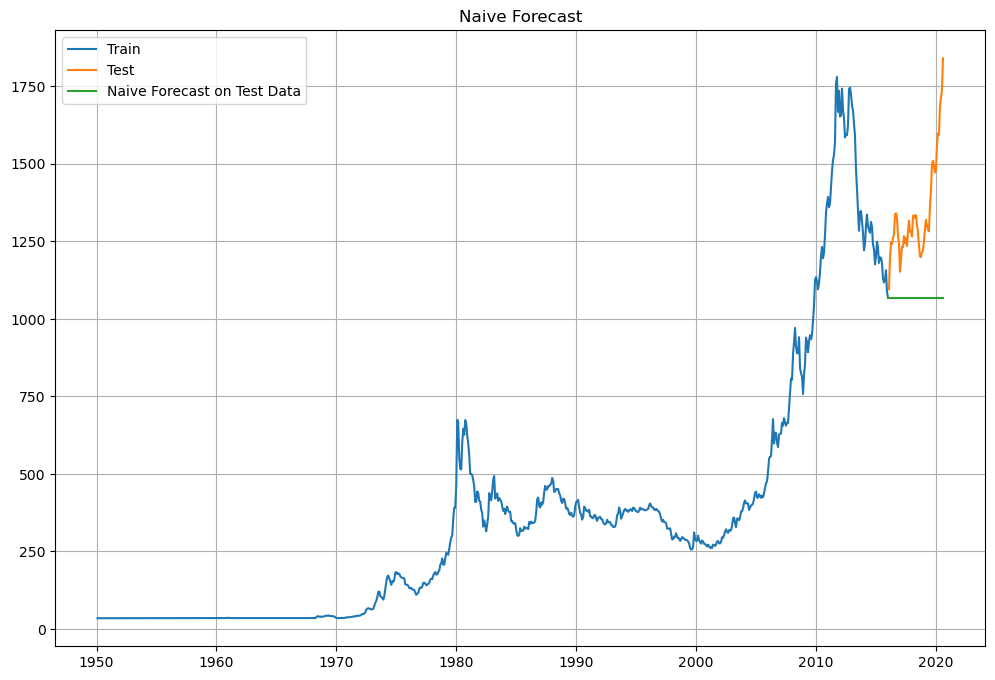

In [31]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'],label='Train')
plt.plot(test['Price'],label='Test')
plt.plot(Naive_test['naive'],label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.grid()

In [32]:
mape_model2_test=mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f"%(mape_model2_test),"%")

For Naive forecast on the Test Data, MAPE is 19.380 %


In [33]:
resultsDF_2=pd.DataFrame({'Test MAPE(%)':[mape_model2_test]},index=['NaiveModl'])
results=pd.concat([results,resultsDF_2])
results

,Test Mape (%),Test MAPE(%)
RegressionOnTime,29.76,NaN
NaiveModl,NaN,19.38


In [34]:
final_model=ExponentialSmoothing(df,
                                trend='additive',
                                seasonal='additive').fit(smoothing_level=0.4,
                                                         smoothing_trend=0.3,
                                                         smoothing_seasonal=0.6)

In [35]:
Mape_final_model=mape(df['Price'].values,final_model.fittedvalues)
print('MAPE:',Mape_final_model)

MAPE: 17.24


In [36]:
prediction=final_model.forecast(steps=len(test))

In [37]:
pred_df=pd.DataFrame({'lower_CI':prediction-1.96*np.std(final_model.resid,ddof=1),
                     'prediction':prediction,
                     'upper_CI':prediction+1.96*np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.713703,1792.864676,1901.015650
2020-09-30,1615.291065,1723.442039,1831.593012
2020-10-31,1538.543199,1646.694172,1754.845146
2020-11-30,1476.724385,1584.875359,1693.026332
2020-12-31,1459.285045,1567.436019,1675.586992


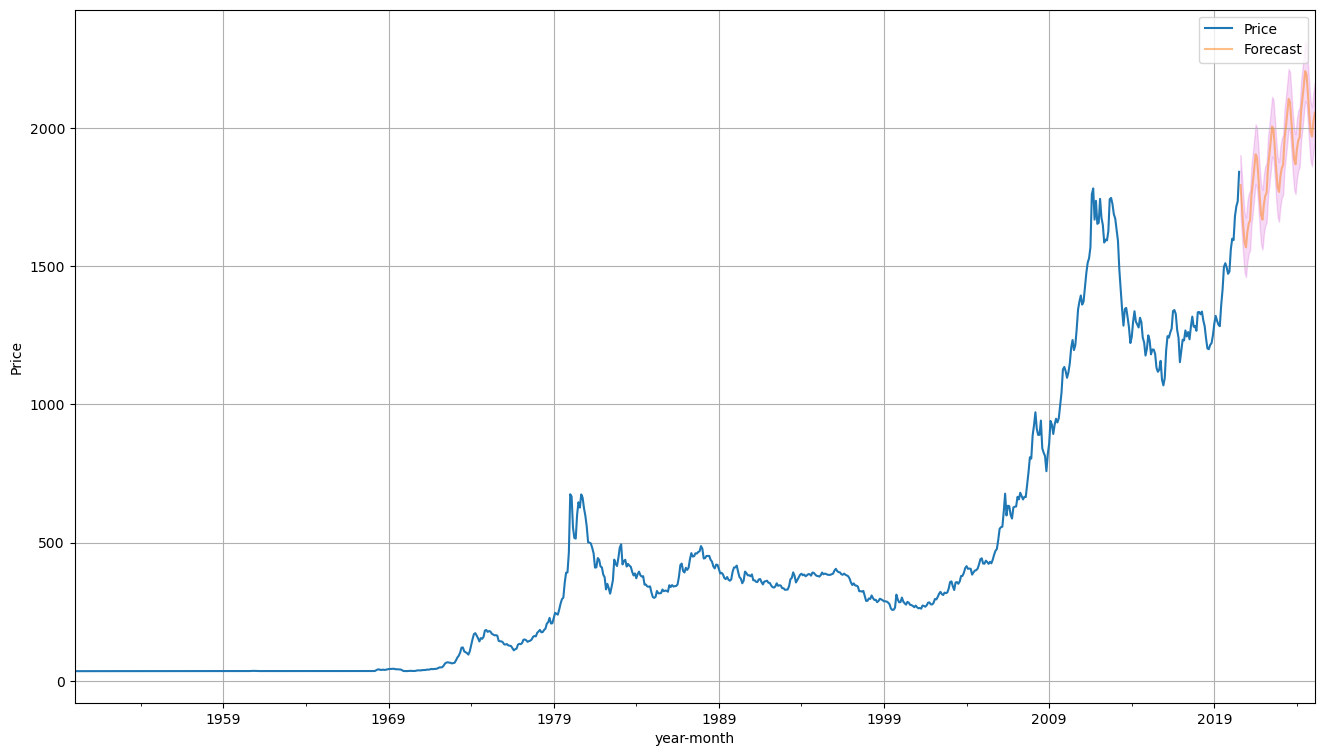

In [38]:
axis=df.plot(label='Actual',figsize=(16,9))
pred_df['prediction'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color='m',alpha=0.15)
axis.set_xlabel('year-month')
axis.set_ylabel('Price')
plt.legend(loc='best')
plt.grid()
plt.show()